# Example 4.19 - Shear deformation of elastoplastic square (finite rotation)

A plane strain square undergoes rigidbody rotation and shear deformation.
Instead of applying return mapping on stress back stress, we first apply rotation for objectivity, and then apply the return mapping.
There is a small difference for finite rotation as compared to infinitesimal deformation.
But note, that because the stress tensor is rotated, it has some normal stress component as well.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from nlfem.hardening import combHard
from nlfem.rotatedStress import rotatedStress

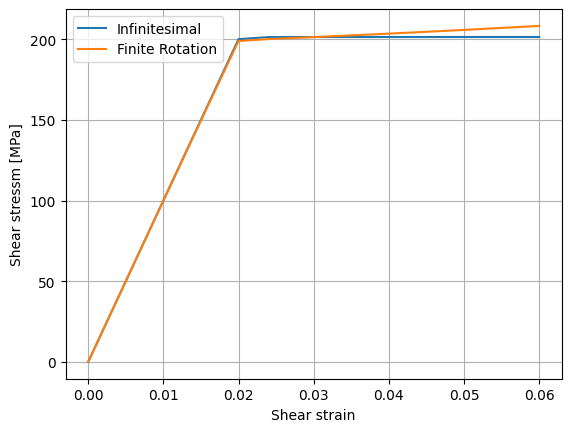

In [18]:
# 
Young = 24000
nu = 0.2
mu = Young / (2 * (1 + nu))
lambdaa = nu * Young / ( (1 + nu) * (1 - 2 * nu) )
beta = 0
H = 1000
sY = 200*np.sqrt(3)
mp = np.array([lambdaa, mu, beta, H, sY])
Iden = np.array([1,1,1,0,0,0])
D = 2 * mu * np.eye(6) + lambdaa * np.outer(Iden, Iden)
D[3, 3] = mu
D[4, 4] = mu
D[5, 5] = mu

L = np.zeros((3, 3))

stressN = np.zeros(6)
deps = np.zeros(6)
alphaN = np.zeros(6)
epN = 0

stressRN = stressN.copy()
alphaRN = alphaN.copy()
epRN = epN

X = [0]
YR = [0]
Y = [0]
for i in range(1, 16):
    deps[3] = 0.004
    L[0, 1] = 0.024
    L[1, 0] = -0.02
    
    stressRN, alphaRN = rotatedStress(L, stressRN, alphaRN)
  
    stressR, alphaR, epR = combHard(mp, D, deps, stressRN, alphaRN, epRN)
   
    stress, alpha, ep = combHard(mp, D, deps, stressN, alphaN, epN)
    X.append(i*deps[3])
    Y.append(stress[3])
    YR.append(stressR[3])
    
    stressN = stress
    alphaN = alpha

    stressRN = stressR
    alphaRN = alphaR
    epRN = epR

plt.plot(X, Y, label = "Infinitesimal")
plt.plot(X, YR, label = "Finite Rotation")
plt.xlabel("Shear strain")
plt.ylabel("Shear stressm [MPa]")
plt.legend()
plt.grid()

In [19]:
stress, stressR

(array([  0.        ,   0.        ,   0.        , 201.33333333,
          0.        ,   0.        ]),
 array([ 4.33460167e+01, -4.33460167e+01, -1.23661492e-15,  2.08205127e+02,
         0.00000000e+00,  0.00000000e+00]))